In [45]:
import pandas as pd

import numpy as np

from datetime import datetime

%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt

import webbrowser

import seaborn as sms

In [46]:
sms.set(style="darkgrid")

In [47]:
mpl.rcParams['figure.figsize'] = (16,9)
pd.set_option('display.max_rows', 500)

## Explorative Data Analysis

Focus is often a visual representation of the data

In [48]:
df_plot=pd.read_csv('C:/Users/Nitin/ds-covid19/data/processed/COVID_small_flat_table.csv',sep=';')
df_plot.head()

,date,Italy,US,Spain,Germany,"Korea,South"
0,2020-01-22,0,1,0,0,0
1,2020-01-23,0,1,0,0,0
2,2020-01-24,0,2,0,0,0
3,2020-01-25,0,2,0,0,0
4,2020-01-26,0,5,0,0,0


<Figure size 1152x648 with 0 Axes>

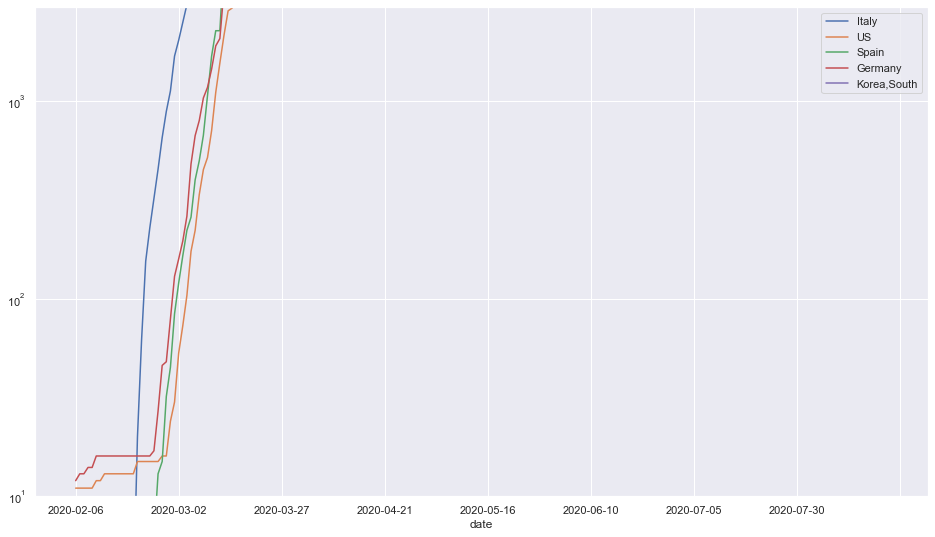

In [49]:
plt.figure();
ax=df_plot.iloc[15:,:].set_index('date').plot()
plt.ylim(10,3000)
ax.set_yscale('log')

## Plot.ly

In [50]:
import plotly.graph_objects as go

In [51]:
import plotly

In [52]:
fig = go.Figure()

In [53]:
country_list=['Italy',
              'US',
              'Spain',
              'Germany',
              'Korea,South',
             ]

In [54]:
## defines how to plot the individual trace
for each in country_list:
    fig.add_trace(go.Scatter(x=df_plot.date,
                        y=df_plot[each],
                        mode='markers+lines',
                        opacity=0.9,
                        line_width=2,
                        marker_size=4,     
                        name=each     
                        )
             )

## defines the overall layout properties
fig.update_layout(
    width=900,
    height=600,
    xaxis_title="Time",
    yaxis_title="Confirmed infected people (source John Hopkins Case, log-scale)",
)
fig.update_yaxes(type="log",range=[1.1,5.5])
fig.update_layout(xaxis_rangeslider_visible=True)

In [57]:
import dash
import dash_core_components as dcc
import dash_html_components as html

app = dash.Dash()
app.layout = html.Div([
    
    html.Label('Multi-Select Country'),
    dcc.Dropdown(
       id='country_drop_down',
       options=[
           {'label':'Italy','value':'Italy'},
           {'label':'US','value':'US'},
           {'label':'Spain','value':'Spain'},
           {'label':'Germany','value':'Germany'},
           {'label':'Korea, South','value':'Korea, South'}
       ],
       value=['US', 'Germany'],  #which are pre-selected
       multi=True 
    ),
    
    doc.Graph(figure=fig, id='main_window_slope')
])



In [58]:
from dash.dependencies import Input, Output

@app.callback(
     Output('main_window_slope','figure'),
     [Input('country_drop_down','value')])
def update_figure(country_list):

    traces = []
    for each in country_list:
        traces.append(dict(x=df_plot.date,
                           y=df_plot[each],
                           mode='markers+lines',
                           opacity=0.9,
                           line_width=2,
                           marker_size=4,     
                           name=each
                          )
                     )
    
    return {
            'data': traces,
            'layout':dict (
               width=1280,
               height=720,
               xaxis_title="Time",
               yaxis_title="Confirmed infected people (source John Hopkins case, log-scale)",
               xaxis={'tickangle':-45,
                     'nticks':20,
                     'tickout':dict(size=14,color="#7f7f7f"),
                     },
               yaxis={'type':'log',
                      'range':'[1.1,5.5]'
                     }
            )
    }

In [59]:
# take care to press stop button before calling once again, since address will be blocked
app.run_server(debug=True, use_reloader=False) # Turn off reloader if inside Jupyter

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: on
